Processing Audio file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args

    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo

    '''
    max_ind = len(raw_data)
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Classification-of-Lung-Sound/csv_data/data.csv')

In [5]:
print(data.start,data.end)

0        0.036
1        0.579
2        2.450
3        3.893
4        5.793
         ...  
6893    11.721
6894    13.693
6895    15.536
6896    17.493
6897    19.436
Name: start, Length: 6898, dtype: float64 0        0.579
1        2.450
2        3.893
3        5.793
4        7.521
         ...  
6893    13.693
6894    15.536
6895    17.493
6896    19.436
6897    19.979
Name: end, Length: 6898, dtype: float64


In [6]:
os.makedirs('processed_audio_files_test', exist_ok=True)

In [7]:
for index,row in data.iterrows():
    print("Index ->",index)
    print("Data->\n",row)
    break

Index -> 0
Data->
 start                        0.036
end                          0.579
crackles                         0
weezels                          0
pid                            101
mode                            sc
filename    101_1b1_Al_sc_Meditron
disease                       URTI
Name: 0, dtype: object


In [8]:
import os
import librosa as lb
import soundfile as sf

path = '/content/drive/MyDrive/Classification-of-Lung-Sound/Respiratory_Sound_Database/audio_and_txt_files/'  # Set the correct path
save_path = '/content/drive/MyDrive/Classification-of-Lung-Sound//processed_audio_files_test/'
maxLen = 6  # seconds

# Assuming you have information about the audio in a single row of the 'data' dataframe
# Replace the following values with the specific details for your single audio file
filename = '104_1b1_Al_sc_Litt3200'
start, end = row['start'], row['end']
# start = your_start_time
# end = your_end_time

audio_file_loc = os.path.join(path, filename + '.wav')

new_filename = filename + '_processed.wav'
save_file_loc = os.path.join(save_path, new_filename)

try:
    audioArr, sampleRate = lb.load(audio_file_loc)
    pureSample = getPureSample(audioArr, start, end, sampleRate)
    reqLen = 6 * sampleRate
    padded_data = lb.util.pad_center(pureSample, size=reqLen, axis=0)
    sf.write(file=save_file_loc, data=padded_data, samplerate=sampleRate)
    print(f"File processed successfully and saved at: {save_file_loc}")
except Exception as e:
    print(f"Error processing file {audio_file_loc}: {e}")


File processed successfully and saved at: /content/drive/MyDrive/Classification-of-Lung-Sound//processed_audio_files_test/104_1b1_Al_sc_Litt3200_processed.wav


Crateing spectrums

In [9]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

def process_audio_file(file_path):
    sound, sample_rate = lb.load(file_path)
    mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')
    plt.show()


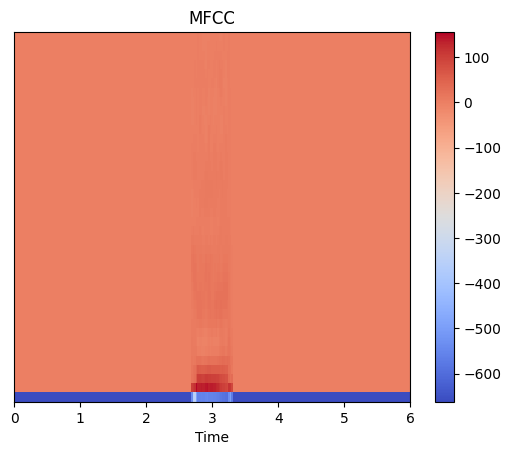

In [10]:
# for index, row in df.iterrows():
file_name = save_path + '104_1b1_Al_sc_Litt3200_processed.wav'  # Assuming 'filename' is the column containing file names
process_audio_file(file_name)

Lung Sound Analysis

In [11]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/Classification-of-Lung-Sound/lungs-model-net.h5", compile=False)

In [12]:
import librosa
import numpy as np

In [16]:
# Here's a sample generate mfccs from a wave file
test_file="/content/drive/MyDrive/Classification-of-Lung-Sound/processed_audio_files_test/104_1b1_Al_sc_Litt3200_processed.wav"

In [14]:
int_to_label = {0: 'URTI', 1: 'Healthy', 2: 'Asthma', 3: 'COPD', 4: 'LRTI', 5: 'Bronchiectasis', 6: 'Pneumonia', 7: 'Bronchiolitis'}

In [18]:

y, sr = librosa.load(test_file)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
log_S = librosa.power_to_db(S)
mfccs = librosa.feature.mfcc(S=log_S, sr=sr)
print(mfccs)

[[-657.9015 -657.9015 -657.9015 ... -657.9015 -657.9015 -657.9015]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 ...
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]
 [   0.        0.        0.     ...    0.        0.        0.    ]]


In [21]:
import librosa
import numpy as np
from keras.models import load_model

# Load the audio file
test_file = "/content/drive/MyDrive/Classification-of-Lung-Sound/processed_audio_files_test/104_1b1_Al_sc_Litt3200_processed.wav"
sound, sample_rate = librosa.load(test_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)

# Preprocess the features as needed (e.g., reshaping)
# Assuming your model requires input in the shape (num_samples, num_features)
# You may need to reshape or preprocess your data accordingly
mfccs = np.expand_dims(mfccs, axis=0)  # Add a batch dimension if needed

# Load the Keras model
model = load_model("/content/drive/MyDrive/Classification-of-Lung-Sound/lungs-model-net.h5", compile=False)

# Make prediction
predictions = model.predict(mfccs)

# Process predictions as needed
print(predictions)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "Net" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 40, 259) dtype=float32>]


In [22]:
import librosa
import numpy as np
from keras.models import load_model

# Load the audio file
test_file = "/content/drive/MyDrive/Classification-of-Lung-Sound/processed_audio_files_test/104_1b1_Al_sc_Litt3200_processed.wav"
sound, sample_rate = librosa.load(test_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)

# Pad or truncate the features to match the expected shape (40, 259)
# Assuming the expected shape is (40, 259)
expected_shape = (40, 259)
if mfccs.shape[1] < expected_shape[1]:
    # If the number of time steps is less than the expected shape, pad it
    mfccs = np.pad(mfccs, ((0, 0), (0, expected_shape[1] - mfccs.shape[1])), mode='constant')
elif mfccs.shape[1] > expected_shape[1]:
    # If the number of time steps is greater than the expected shape, truncate it
    mfccs = mfccs[:, :expected_shape[1]]

# Reshape the features to match the model's expected input shape
mfccs = np.expand_dims(mfccs, axis=0)  # Add a batch dimension

# Load the Keras model
model = load_model("/content/drive/MyDrive/Classification-of-Lung-Sound/lungs-model-net.h5", compile=False)

# Make prediction
predictions = model.predict(mfccs)

# Process predictions as needed
print(predictions)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "Net" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 40, 259) dtype=float32>]


In [20]:

y, sr = librosa.load(test_file)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
log_S = librosa.power_to_db(S)
mfccs = librosa.feature.mfcc(S=log_S, sr=sr)

# Assuming your model requires input in the shape (num_samples, num_features)
# You may need to reshape or preprocess your data accordingly
# Reshape MFCCs to match model input shape
mfccs = np.expand_dims(mfccs, axis=0)  # Add a batch dimension

# Make prediction
predictions = model.predict(mfccs)

# Process predictions as needed
print(predictions)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "Net" expects 3 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 20, 259) dtype=float32>]


In [17]:
net